In [ ]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fits_file = "https://archive.stsci.edu/missions/tess/ffi/s0033/2020/354/3-2/tess2020354000910-s0033-3-2-0203-s_ffic.fits"

In [ ]:
fits.info(fits_file)


Filename: /root/.astropy/cache/download/url/f7460f47ff7ba8dd0cdda3b79f47e72a/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  CAMERA.CCD 3.2 cal    1 ImageHDU       183   (2136, 2078)   float32   
  2  CAMERA.CCD 3.2 uncert    1 ImageHDU       183   (2136, 2078)   float32   


In [ ]:
with fits.open(fits_file, mode = "readonly") as hdulist:
    wcs_info = WCS(hdulist[1].header)
    cal_image = hdulist[1].data
    header = hdulist[1].header

Set MJD-END to 59202.016227 from DATE-END'. [astropy.wcs.wcs]


In [ ]:
mid_time = (header['TSTOP'] + header['TSTART']) / 2

Text(0.5, 1.0, 'TESS Calibrated FFI for Sector 33, Camera 3, CCD 2, Timestamp 2202.513556 BTJD')

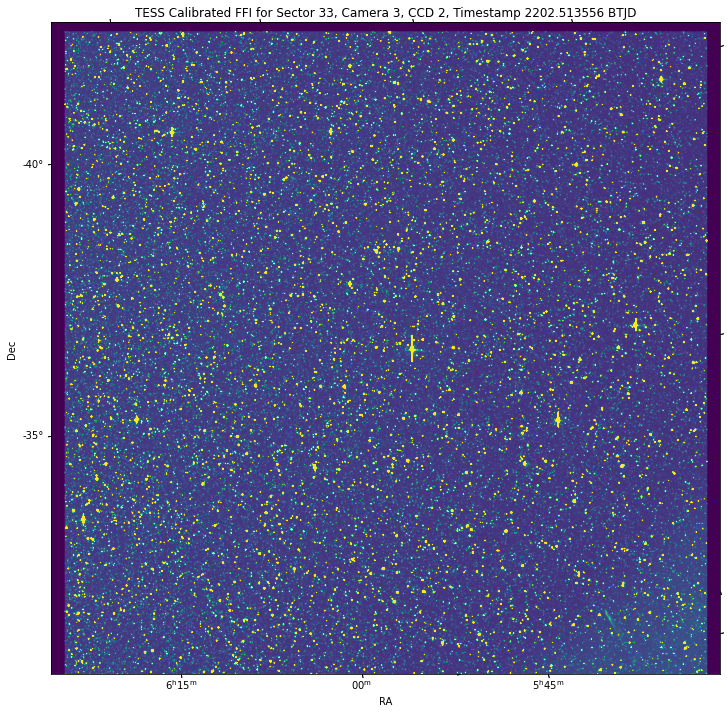

In [ ]:
plt.figure(figsize = (12,12))

plt.subplot(111, projection = wcs_info)
plt.imshow(cal_image, vmin = np.percentile(cal_image,4),vmax = np.percentile(cal_image, 98),origin = "lower")
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title("TESS Calibrated FFI for Sector 33, Camera 3, CCD 2, Timestamp %f BTJD" % mid_time)
